<DIV ALIGN=CENTER>

# Introduction to Deep Learning
## Professor Robert J. Brunner
  
</DIV>  
-----
-----

## Introduction

Text

-----

Total number of samples = 1797


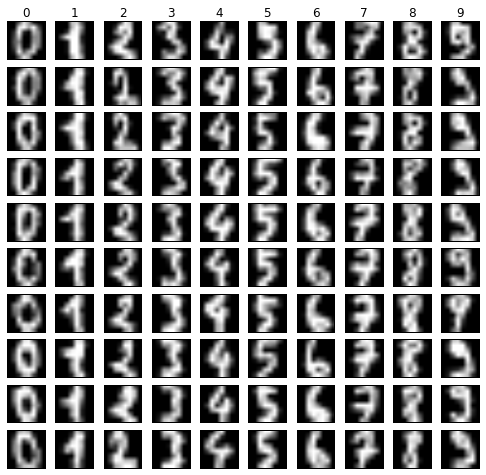

In [1]:
%matplotlib inline

# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

In [2]:
# Compute cross validation samples

import sklearn.cross_validation as cv

(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

# Get sizes
train_dim_one = x_train.shape[0]
train_dim_two = x_train.shape[1]
test_dim_one = x_test.shape[0]

In [3]:
import numpy as np
np.random.seed(23)

num_classes = 10
max_pixel = 16

# Flatten image arrays
x_train = x_train.reshape(train_dim_one, train_dim_two)
x_test = x_test.reshape(test_dim_one, train_dim_two)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize image arrays
x_train /= max_pixel
x_test /= max_pixel

print('{:5d} train samples'.format(x_train.shape[0]))
print('{:5d} test samples'.format(x_test.shape[0]))

# convert class vectors to binary class matrices
from keras.utils import np_utils

y_trainc = np_utils.to_categorical(y_train, num_classes)
y_testc = np_utils.to_categorical(y_test, num_classes)

 1347 train samples
  450 test samples


-----

### Construct Model

We construct then visualize model

-----

In [4]:
# Build model
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(10, input_dim=train_dim_two))
model.add(Activation('softmax'))

Using Theano backend.


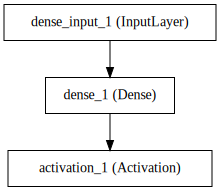

In [5]:
# Display model flowchart
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [6]:
# Display text representation of Keras model
model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_1 (Dense)                    (None, 10)          650         dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 10)          0           dense_1[0][0]                    
Total params: 650
____________________________________________________________________________________________________


-----

### Compute Model

-----

In [7]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [8]:
# Fit model
batch_size = 25
num_epoch = 5

history = model.fit(x_train, y_trainc,
                    batch_size=batch_size, nb_epoch=num_epoch,
                    verbose=1, validation_data=(x_test, y_testc))

Train on 1347 samples, validate on 450 samples
Epoch 1/5
1347/1347 [==============================] - 0s - loss: 2.1991 - acc: 0.2034 - val_loss: 2.0373 - val_acc: 0.3378
Epoch 2/5
1347/1347 [==============================] - 0s - loss: 1.9545 - acc: 0.4306 - val_loss: 1.8268 - val_acc: 0.5333
Epoch 3/5
1347/1347 [==============================] - 0s - loss: 1.7468 - acc: 0.6095 - val_loss: 1.6389 - val_acc: 0.6911
Epoch 4/5
1347/1347 [==============================] - 0s - loss: 1.5632 - acc: 0.7387 - val_loss: 1.4651 - val_acc: 0.7356
Epoch 5/5
1347/1347 [==============================] - 0s - loss: 1.4013 - acc: 0.8010 - val_loss: 1.3192 - val_acc: 0.7733


-----

### Results

-----

In [9]:
# Obtain score results
score = model.evaluate(x_test, y_testc, verbose=0)
print('Test score: {:4.3f}'.format(score[0]))
print('Test accuracy: {:4.3f}'.format(score[1]))

Test score: 1.319
Test accuracy: 0.773


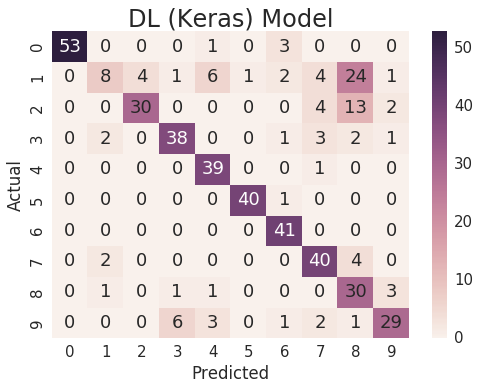

In [10]:
# Obtain test predictions
y_pred = model.predict_classes(x_test, verbose = 0)

# Plot confusion matrix
from helper_code import mlplots as mlp

nms = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
mlp.confusion(y_test, y_pred, nms, 10, 'DL (Keras) Model')

-----

### Complex Network


-----

Train on 1347 samples, validate on 450 samples
Epoch 1/10
1347/1347 [==============================] - 0s - loss: 1.6353 - acc: 0.4699 - val_loss: 0.8620 - val_acc: 0.8600
Epoch 2/10
1347/1347 [==============================] - 0s - loss: 0.7762 - acc: 0.8233 - val_loss: 0.4331 - val_acc: 0.9067
Epoch 3/10
1347/1347 [==============================] - 0s - loss: 0.4725 - acc: 0.8849 - val_loss: 0.2954 - val_acc: 0.9267
Epoch 4/10
1347/1347 [==============================] - 0s - loss: 0.3631 - acc: 0.8998 - val_loss: 0.2293 - val_acc: 0.9422
Epoch 5/10
1347/1347 [==============================] - 0s - loss: 0.2996 - acc: 0.9087 - val_loss: 0.1934 - val_acc: 0.9378
Epoch 6/10
1347/1347 [==============================] - 0s - loss: 0.2646 - acc: 0.9272 - val_loss: 0.1831 - val_acc: 0.9489
Epoch 7/10
1347/1347 [==============================] - 0s - loss: 0.2290 - acc: 0.9391 - val_loss: 0.1541 - val_acc: 0.9578
Epoch 8/10
1347/1347 [==============================] - 0s - loss: 0.2182 - ac

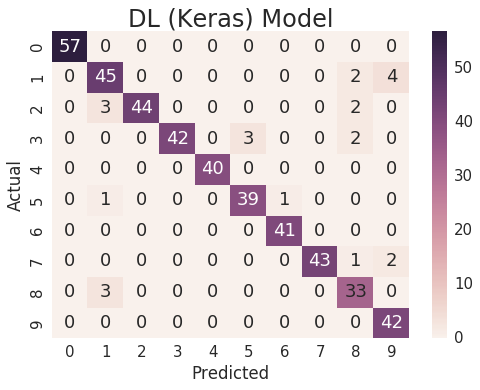

In [11]:
from keras.layers.core import Dropout

model = Sequential()
model.add(Dense(128, input_shape=(train_dim_two,)))
model.add(Activation('tanh'))
model.add(Dropout(0.6))
model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Fit model
batch_size = 25
num_epoch = 10

history = model.fit(x_train, y_trainc,
                    batch_size=batch_size, nb_epoch=num_epoch,
                    verbose=1, validation_data=(x_test, y_testc))

print(50*'-')
score = model.evaluate(x_test, y_testc, verbose=0)
print('Test score: {:4.3f}'.format(score[0]))
print('Test accuracy: {:4.3f}'.format(score[1]))

y_pred = model.predict_classes(x_test, verbose = 0)

# Plot confusion matrix
mlp.confusion(y_test, y_pred, nms, 10, 'DL (Keras) Model')

-----

### Blind Testing

-----

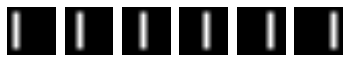

In [12]:
# Test on our ones

ones = hd.make_ones()
hd.plot_numbers(ones)

In [13]:
# Create input label data (all ones)
y_ones = np.empty(ones.shape[0], dtype=np.int8)
y_ones.fill(1)

# Convert to categorical labels
y_onesc = np_utils.to_categorical(y_ones, num_classes)

In [14]:
# Obtain model predictions and convert probability matrix to labels
pred = model.predict(ones, verbose=10)
y_pred = np.argmax(pred, axis=1)

# Display our *confusion matrix*
print(y_ones)
print(y_pred)

[1 1 1 1 1 1]
[4 0 1 1 9 7]


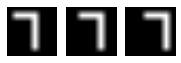

In [15]:
# Now test on our sevens

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [16]:
# Create input label data (all sevens)
y_sevens = np.empty(sevens.shape[0], dtype=np.int8)
y_sevens.fill(7)

# Convert to categorical labels
y_sevensc = np_utils.to_categorical(y_sevens, num_classes)

In [17]:
# Obtain model predictions and convert probability matrix to labels
pred = model.predict(sevens, verbose=10)
y_pred = np.argmax(pred, axis=1)

# Display our *confusion matrix*
print(y_sevens)
print(y_pred)

[7 7 7]
[2 0 7]


-----
### Student Activity

In the preceding cells, we introduced deep learning by using the Keras framework. Now that you have run the Notebook, go back and make the
following changes to see how the results change.

1. Change the 

2. 

3. 

-----